In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import scipy.stats as sts
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [32]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)

In [33]:
# engine.execute('SELECT * FROM hawaii LIMIT 5').fetchall()
# DIDN'T WORK, wanted to see output, is 'tobs' a time or temp?

In [34]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [35]:
# inspect data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [36]:
# View all of the classes that automap found - DONE ABOVE

In [37]:
# Save references to each table
# Measrement-ME, Station - ST
ME = Base.classes.measurement
ST = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [39]:
# Get a list of column names and types
## 'tobs' is time of observation

columns = inspector.get_columns('measurement')  
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [40]:
sample_list = session.query(ME.station).all()
set(sample_list)

{('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)}

In [41]:
# Get a list of column names and types
##'ea' is the class/tablename
columns = inspector.get_columns('station')  
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [42]:
sample_list2 = session.query(ST.station).all()
set(sample_list2)

{('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)}

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.

In [44]:
#Inspect dates
#How many dates are there?

In [17]:
session.query(func.count(ME.date)).all()

[(19550,)]

In [18]:
# what is the earliest date?
session.query(ME.date).order_by(ME.date).first()


('2010-01-01',)

In [45]:
# what is the latest date?
session.query(ME.date).order_by(ME.date.desc()).first()


('2017-08-23',)

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [47]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_12 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_12                 


datetime.date(2016, 8, 23)

In [48]:
# Perform a query to retrieve the data and precipitation scores
hawaii_precip = session.query(ME.date, func.sum(ME.prcp)).\
    filter(ME.date >= last_12).\
    group_by(ME.date).\
    order_by(ME.date).all()
hawaii_precip
                     

[('2016-08-23', 2.71),
 ('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.359999999

In [49]:
# Save the query results as a Pandas DataFrame and set the index to the date column
hawaii_precip = pd.DataFrame(hawaii_precip, columns=["Date","Precipitation"])
hawaii_precip.set_index("Date", inplace=True,)
hawaii_precip.head()

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


In [50]:
# Sort the dataframe by date
## DATA IS SORTED


<AxesSubplot:xlabel='Date'>

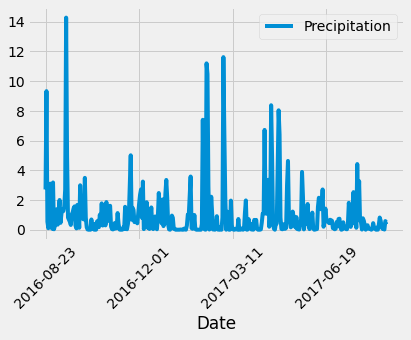

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data

hawaii_precip.plot(rot=45)

# annual_precip.savefig(hawaii_precip)




In [ ]:
## Dryest months appear to be August - December 2016, and April - June 2017

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
hawaii_precip.describe()

,Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number stations in the dataset
session.query(ST.id).count()

9

In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(ME.station, func.count(ME.station)).\
                group_by(ME.station).\
                order_by(func.count(ME.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
#'USC00519281', 2772,  [0][0] is the first position in the above table.= most_active[0][0]

winner = most_active[0][0]
winner

'USC00519281'

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(
    func.min(ME.tobs),
    func.max(ME.tobs),
    func.avg(ME.tobs)).filter(ME.station == winner).all()

[(54.0, 85.0, 71.66378066378067)]

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# winner defined as USC00519281
# last_12 defined above as, datetime.date(2016, 8, 23)


hawaii_temp = session.query(ME.tobs).\
    filter(ME.date >= last_12).\
    filter(ME.station == winner).all()
hawaii_temp

hawaii_tempdf = pd.DataFrame(hawaii_temp, columns=["temperature"])








array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

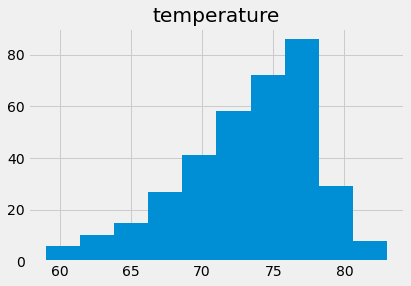

In [58]:
hawaii_tempdf.hist()

# Close session

In [59]:
# Close Session
session.close()